## Introduction to Data Version Control



In this kernel we are planning to introduce about Data Version Control which one of best open source tools available in the market for [Machine Learning
Models and Dataset Versioning](https://dvc.org/doc/use-cases/data-and-model-files-versioning) and [other amazing features](https://dvc.org/features).

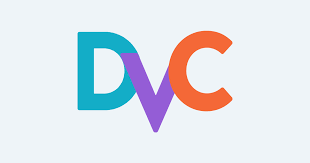

<br>
<br>

We are going to play with an actual Machine Learning scenario. It explores the NLP problem of predicting tags for a given StackOverflow
question. For example, we want one classifier which can predict a post that is about the Python language by tagging it python.

This kernel has been made adopting [DVC get-Started tutorial](https://dvc.org/doc/get-started/agenda) and full credit goes to DVC team for making that.
A github repo for get-starter tutorial can be found [here](https://github.com/iterative/example-get-started).

## Installing DVC

Installing DVC is very easy. There are mainly three recommended ways:
- pip
- OS-specific package managers
- HomeBrew(for apple users)


We are going to install with `pip- Python package manger`. For other installation
methods checkout [here](https://dvc.org/doc/get-started/install)

In [1]:
import warnings  
warnings.filterwarnings('ignore')

In [2]:
# Installing DVC
! pip install dvc 

     |████████████████████████████████| 276kB 2.9MB/s 
     |████████████████████████████████| 133kB 33.6MB/s 
     |████████████████████████████████| 102kB 27.3MB/s 
     |████████████████████████████████| 51kB 16.8MB/s 
     |████████████████████████████████| 71kB 21.3MB/s 
     |████████████████████████████████| 460kB 37.8MB/s 
     |████████████████████████████████| 552kB 37.0MB/s 
     |████████████████████████████████| 870kB 36.3MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=df48a2c5452b8031e21f57360ac7d0f5bd8bf293f4af134a86fc04abe904006d
  Stored in directory: /tmp/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
  Created wheel for shortuuid: filename=shortuuid-0.5.0-cp36-none-any.whl size=5499 sha256=8c87080282d0d1431f1e3c699454eb9d1e7196f43e60bf51f2c3fd9d9232d08e
  Stored in directory: /tmp/.cache/pip/wheels/3f/eb/fd/69e5177f67b505e44acbd1aedfbe44b91768ee0c4cd5636576
  Created wheel for treelib: f

In [3]:
# Checking out DVC installation
! dvc -h


usage: dvc [-h] [-q | -v] [-V] COMMAND ...

Data Version Control

optional arguments:
  -h, --help     show this help message and exit
  -q, --quiet    Be quiet.
  -v, --verbose  Be verbose.
  -V, --version  Show program's version.

Available Commands:
  COMMAND        Use dvc COMMAND --help for command-specific help.
    init         Initialize DVC in the current directory.
    get          Download data from DVC repository.
    get-url      Download or copy files from URL.
    destroy      Remove DVC-files, local DVC config and data cache.
    add          Take data files or directories under DVC control.
    remove       Remove DVC-file outputs.
    move         Rename or move a DVC controlled data file or a directory.
    unprotect    Unprotect data files or directories.
    run          Generate a stage file from a command and execute the command.
    repro        Check for changes and reproduce stages and dependencies.
    pull         Pull data files from a DVC remote storage.
 

## Initialising NLP Project

In [4]:
! mkdir get-started && cd get-started

In [5]:
from pathlib import Path
import os

a = Path.cwd() / "get-started"
os.chdir(a)

In [6]:
# Initialising git in our folder
! git init

Initialized empty Git repository in /kaggle/working/get-started/.git/


In [7]:
# Run DVC initialization in a repository directory to create the DVC meta files and directories
! dvc init


You can now commit the changes to git.

+---------------------------------------------------------------------+
|                                                                     |
|        DVC has enabled anonymous aggregate usage analytics.         |
|     Read the analytics documentation (and how to opt-out) here:     |
|              https://dvc.org/doc/user-guide/analytics               |
|                                                                     |
+---------------------------------------------------------------------+

What's next?
------------
- Check out the documentation: https://dvc.org/doc
- Get help and share ideas: https://dvc.org/chat
- Star us on GitHub: https://github.com/iterative/dvc


In [8]:
# configuring git for user account
! git config --global user.name "kuranbenoy" #Replace with your github username
! git config --global user.email "kurian.bkk@gmail.com" #Replace with your email id
# commit the initialised git files
! git commit -m "initialize DVC"

[master (root-commit) 03c1d2b] initialize DVC
 2 files changed, 9 insertions(+)
 create mode 100644 .dvc/.gitignore
 create mode 100644 .dvc/config


## Configuring DVC remotes


A DVC remote is used to share your ML models and datasets with others. The various types of remotes DVC currently supports is:
https://dvc.org/doc/get-started/configure
- `local` - Local directory
- `s3` - Amazon Simple Storage Service
- `gs` - Google Cloud Storage
- `azure` - Azure Blob Storage
- `ssh` - Secure Shell
- `hdfs` - The Hadoop Distributed File System
- `http` - Support for HTTP and HTTPS protocolbucks

> Note we are using remote as a local directory as storage. **It's usually recommended to use Cloud storage services as DVC remote.**

[More information](https://dvc.org/doc/get-started/configure)

In [9]:
! dvc remote add -d myremote /tmp/dvc-storage

Setting 'myremote' as a default remote.


In [10]:
 ! git commit .dvc/config -m "initialize DVC local remote"

[master 6cf2331] initialize DVC local remote
 1 file changed, 4 insertions(+)


## Downloading files



In [11]:
# Download the data
! mkdir data/
!  dvc get https://github.com/iterative/dataset-registry \
        get-started/data.xml -o data/data.xml

Multi-Threaded:
!
  0%|          |../../../tmp/tmph1talkvbdvc-rep0/37916850 [00:00<?,        ?B/s]
  7%|▋         |../../../tmp/tmph1tal2818048/37916850 [00:00<00:01,    24.7MB/s]
 41%|████      |../../../tmp/tmph1ta15597568/37916850 [00:00<00:00,    32.6MB/s]
 73%|███████▎  |../../../tmp/tmph1ta27852800/37916850 [00:00<00:00,    41.6MB/s]


In [12]:
# add file(directory) to DVC
! dvc add data/data.xml

Saving 'data/data.xml' to '.dvc/cache/a3/04afb96060aad90176268345e10355'.
Saving information to 'data/data.xml.dvc'.

To track the changes with git, run:

	git add data/data.xml.dvc data/.gitignore


In [13]:
# add DVC files to git and update gitignore
! git add data/.gitignore data/data.xml.dvc
! git commit -m "add source data to DVC"

[master 333bf47] add source data to DVC
 2 files changed, 8 insertions(+)
 create mode 100644 data/.gitignore
 create mode 100644 data/data.xml.dvc


[more information](https://dvc.org/doc/get-started/add-files)

In [14]:
#  push them from your repository to the default remote storage*:
! dvc push

Multi-Threaded:
!
  0%|          |data/data.xml                  0/37916850 [00:00<?,        ?B/s]


## Retrieving Data

Now since we pushed our data, we are going to do the opposite of push ie `pull` similar to git analogy.
An easy way to test it is by removing currently downloaded data.

In [15]:
! rm -f data/data.xml

In [16]:
# Now your data returns back to repositary
! dvc pull

Everything is up to date.


In [17]:
# incase just to retrieve single dataset or file
! dvc pull data/data.xml.dvc

Everything is up to date.


## Conncting with code

For providing full Machine Learning reproducibility. It is important to connect code with Datasets which are being reproducible by
using commands like `dvc add/push/pull`.



In [18]:
# run these commands to get the sample code:
! wget wget https://code.dvc.org/get-started/code.zip
! unzip code.zip
! rm -f code.zip

wget: /opt/conda/lib/libuuid.so.1: no version information available (required by wget)
--2019-10-09 16:59:09--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2019-10-09 16:59:09--  https://code.dvc.org/get-started/code.zip
Resolving code.dvc.org (code.dvc.org)... 3.214.163.243, 3.212.234.252, 52.7.140.64, ...
Connecting to code.dvc.org (code.dvc.org)|3.214.163.243|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-us-east-2.amazonaws.com/dvc-public/code/get-started/code.zip [following]
--2019-10-09 16:59:09--  https://s3-us-east-2.amazonaws.com/dvc-public/code/get-started/code.zip
Resolving s3-us-east-2.amazonaws.com (s3-us-east-2.amazonaws.com)... 52.219.80.59
Connecting to s3-us-east-2.amazonaws.com (s3-us-east-2.amazonaws.com)|52.219.80.59|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3453 (3.4K) [application/zip]
Saving to: ‘code.zi

Having installed the `src/prepare.py` script in your repo, the following command
transforms it into a reproducible
[stage](https://dvc.org/doc/user-guide/dvc-files-and-directories) for the ML pipeline we're
building (described in detail [in the documentation](https://dvc.org/doc/get-started/example-pipeline)).

Stages are run using dvc run [command] and options among which we use:

- d for dependency: specify an input file
- o for output: specify an output file ignored by git and tracked by dvc
- M for metric: specify an output file tracked by git
- f for file: specify the name of the dvc file.
- command: a bash command, mostly a python script invocation

In [19]:
# Create a pipeline to create  folder data/prepared with files train.tsv and test.tsv
! dvc run -f prepare.dvc \
          -d src/prepare.py -d data/data.xml \
          -o data/prepared \
          python src/prepare.py data/data.xml

Running command:
	python src/prepare.py data/data.xml
Saving 'data/prepared' to '.dvc/cache/68/36f797f3924fb46fcfd6b9f6aa6416.dir'.
Saving information to 'prepare.dvc'.

To track the changes with git, run:

	git add data/.gitignore prepare.dvc


In [20]:
!  git add data/.gitignore prepare.dvc
!  git commit -m "add data preparation stage"

[master de74f92] add data preparation stage
 2 files changed, 14 insertions(+)
 create mode 100644 prepare.dvc


In [21]:
! dvc push

Multi-Threaded:
!
  0%|          |data/prepared/test.tsv          0/4819529 [00:00<?,        ?B/s]

!

  0%|          |data/prepared                       0/137 [00:00<?,        ?B/s]


!


  0%|          |data/prepared/train.tsv        0/19041790 [00:00<?,        ?B/s]




                                                                                


                                                                                


## Pipeline

Using `dvc run` multiple times, and specifying outputs of a command (stage) as dependencies in another one, we can describe a sequence of commands that gets to a desired result.
This is what we call a data pipeline or computational graph.



In [22]:
# Lets create a second stage (after prepare.dvc, created in the previous chapter) to perform feature extraction
! dvc run -f featurize.dvc \
          -d src/featurization.py -d data/prepared/ \
          -o data/features \
           python src/featurization.py data/prepared data/features

Running command:
	python src/featurization.py data/prepared data/features
The input data frame data/prepared/train.tsv size is (20110, 3)
The output matrix data/features/train.pkl size is (20110, 5002) and data type is float64
The input data frame data/prepared/test.tsv size is (4890, 3)
The output matrix data/features/test.pkl size is (4890, 5002) and data type is float64
Saving 'data/features' to '.dvc/cache/8d/5b8ce7a24705fc41f947623cac1860.dir'.
Saving information to 'featurize.dvc'.

To track the changes with git, run:

	git add featurize.dvc data/.gitignore


In [23]:
# A third stage for training the model
! dvc run -f train.dvc \
          -d src/train.py -d data/features \
          -o model.pkl \
          python src/train.py data/features model.pkl

Running command:
	python src/train.py data/features model.pkl
Input matrix size (20110, 5002)
X matrix size (20110, 5000)
Y matrix size (20110,)
Saving 'model.pkl' to '.dvc/cache/43/630cce66a2432dcecddc9dd006d0a7'.
Saving information to 'train.dvc'.

To track the changes with git, run:

	git add .gitignore train.dvc


In [24]:
%%bash
git add data/.gitignore .gitignore featurize.dvc train.dvc
git commit -m "add featurization and train steps to the pipeline"
dvc push


[master edda4fa] add featurization and train steps to the pipeline
 4 files changed, 28 insertions(+)
 create mode 100644 .gitignore
 create mode 100644 featurize.dvc
 create mode 100644 train.dvc


Multi-Threaded:
!
  0%|          |data/features/test.pkl          0/2285457 [00:00<?,        ?B/s]

!

  0%|          |data/features                       0/137 [00:00<?,        ?B/s]


!


  0%|          |data/features/train.pkl         0/9241474 [00:00<?,        ?B/s]



!



  0%|          |model.pkl                       0/6262877 [00:00<?,        ?B/s]


                                                                                



                                                                                

                                                                                





                                                                                




## Pipelines Visualisation

In [25]:
! dvc pipeline show --ascii train.dvc 

)07==ERROR: unexpected error - curs_set() returned ERR

Having any troubles? Hit us up at https://dvc.org/support, we are always happy to help!


## Metrics

The last stage we would like to add to our pipeline is its the evaluation. Data science is a metric-driven R&D-like process and `dvc metrics` along with DVC metric 
files provide a framework to capture and compare experiments performance.


`evaluate.py` calculates AUC value using the test data set. It reads features from the `features/test.pkl` file and produces a DVC metric file - `auc.metric`. It is a special DVC output file type, in this case it's just a plain text file with a single number inside.

In [26]:
! dvc run -f evaluate.dvc \
          -d src/evaluate.py -d model.pkl -d data/features \
          -M auc.metric \
          python src/evaluate.py model.pkl \
                 data/features auc.metric

Running command:
	python src/evaluate.py model.pkl data/features auc.metric
Output 'auc.metric' doesn't use cache. Skipping saving.
Saving information to 'evaluate.dvc'.

To track the changes with git, run:

	git add evaluate.dvc


> Please, refer to the [dvc metrics](https://dvc.org/doc/commands-reference/metrics) command documentation to see more available options and details.

In [27]:
%%bash
git add evaluate.dvc auc.metric
git commit -m "add evaluation step to the pipeline"

[master 2326886] add evaluation step to the pipeline
 2 files changed, 16 insertions(+)
 create mode 100644 auc.metric
 create mode 100644 evaluate.dvc


In [28]:
! dvc push

Everything is up to date.


In [29]:
# Tag as a checkpoint to cpmpare further experiments
! git tag -a "baseline-experiment" -m "baseline"

## Experiments

Data science process is inherently iterative and R&D like - data scientist may try many different approaches, different hyper-parameter values and "fail" 
many times before the required level of a metric is achieved.

We are modifying our feature extraction of our files. Inorder to use `bigrams`. We are increasing no of features and n_gram_range in our file `src/featurization.py`.

In [30]:
%%writefile src/featurization.py
import os
import sys
import errno
import pandas as pd
import numpy as np
import scipy.sparse as sparse

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

try:
    import cPickle as pickle
except ImportError:
    import pickle

np.set_printoptions(suppress=True)

if len(sys.argv) != 3 and len(sys.argv) != 5:
    sys.stderr.write('Arguments error. Usage:\n')
    sys.stderr.write('\tpython featurization.py data-dir-path features-dir-path\n')
    sys.exit(1)

train_input = os.path.join(sys.argv[1], 'train.tsv')
test_input = os.path.join(sys.argv[1], 'test.tsv')
train_output = os.path.join(sys.argv[2], 'train.pkl')
test_output = os.path.join(sys.argv[2], 'test.pkl')

try:
    reload(sys)
    sys.setdefaultencoding('utf-8')
except NameError:
    pass


def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:  # Python >2.5
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise


def get_df(data):
    df = pd.read_csv(
        data,
        encoding='utf-8',
        header=None,
        delimiter='\t',
        names=['id', 'label', 'text']
    )
    sys.stderr.write('The input data frame {} size is {}\n'.format(data, df.shape))
    return df


def save_matrix(df, matrix, output):
    id_matrix = sparse.csr_matrix(df.id.astype(np.int64)).T
    label_matrix = sparse.csr_matrix(df.label.astype(np.int64)).T

    result = sparse.hstack([id_matrix, label_matrix, matrix], format='csr')

    msg = 'The output matrix {} size is {} and data type is {}\n'
    sys.stderr.write(msg.format(output, result.shape, result.dtype))

    with open(output, 'wb') as fd:
        pickle.dump(result, fd, pickle.HIGHEST_PROTOCOL)
    pass


mkdir_p(sys.argv[2])

# Generate train feature matrix
df_train = get_df(train_input)
train_words = np.array(df_train.text.str.lower().values.astype('U'))

bag_of_words = CountVectorizer(stop_words='english',
                               max_features=5000,
                              ngram_range=(1, 2),)
bag_of_words.fit(train_words)
train_words_binary_matrix = bag_of_words.transform(train_words)
tfidf = TfidfTransformer(smooth_idf=False)
tfidf.fit(train_words_binary_matrix)
train_words_tfidf_matrix = tfidf.transform(train_words_binary_matrix)

save_matrix(df_train, train_words_tfidf_matrix, train_output)

# Generate test feature matrix
df_test = get_df(test_input)
test_words = np.array(df_test.text.str.lower().values.astype('U'))
test_words_binary_matrix = bag_of_words.transform(test_words)
test_words_tfidf_matrix = tfidf.transform(test_words_binary_matrix)

save_matrix(df_test, test_words_tfidf_matrix, test_output)



Overwriting src/featurization.py


## Reproduce

We described our first pipeline. Basically, we created a number of DVC-file. Each file describes a single stage we need to run (a pipeline) towards a final result.
Each depends on some data (either source data files or some intermediate results from another DVC-file file) and code files.

In [31]:
# Using DVC Repro here 
! dvc repro train.dvc


Running command:
	python src/featurization.py data/prepared data/features
The input data frame data/prepared/train.tsv size is (20110, 3)
The output matrix data/features/train.pkl size is (20110, 5002) and data type is float64
The input data frame data/prepared/test.tsv size is (4890, 3)
The output matrix data/features/test.pkl size is (4890, 5002) and data type is float64
Saving 'data/features' to '.dvc/cache/d3/f8d7cdf1f9cd304386e24921649330.dir'.
Saving information to 'featurize.dvc'.
Running command:
	python src/train.py data/features model.pkl
Input matrix size (20110, 5002)
X matrix size (20110, 5000)
Y matrix size (20110,)
Saving 'model.pkl' to '.dvc/cache/56/f03228a7d8a499336132ad1edbe5fd'.
Saving information to 'train.dvc'.

To track the changes with git, run:

	git add train.dvc featurize.dvc


In [32]:
! git commit -a -m "bigram model"

[master cb34afa] bigram model
 2 files changed, 6 insertions(+), 6 deletions(-)


In [33]:
! git checkout baseline-experiment
! dvc checkout

Note: checking out 'baseline-experiment'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 2326886... add evaluation step to the pipeline


## Compare Expermiments

DVC makes it easy to iterate on your project using Git commits with tags or Git branches. It provides a way to try different ideas, keep track of them, 
switch back and forth. To find the best performing experiment or track the progress, a special metric output type is supported in 
DVC (described in one of the previous steps).

In [34]:
%%bash
git checkout master
dvc checkout
dvc repro evaluate.dvc

Running command:
	python src/evaluate.py model.pkl data/features auc.metric
Output 'auc.metric' doesn't use cache. Skipping saving.
Saving information to 'evaluate.dvc'.

To track the changes with git, run:

	git add evaluate.dvc


Previous HEAD position was 2326886... add evaluation step to the pipeline
Switched to branch 'master'
  0%|          |Checkout                              0/6 [00:00<?,     ?file/s]
!
  0%|          |Creating unpacked dir                 0/2 [00:00<?,     ?file/s]


In [35]:
%%bash
git commit -a -m "evaluate bigram model"
git tag -a "bigram-experiment" -m "bigrams"

[master 464ccc3] evaluate bigram model
 2 files changed, 5 insertions(+), 5 deletions(-)


In [36]:
! dvc metrics show -T

working tree:
	auc.metric: 0.615827
baseline-experiment:
	auc.metric: 0.588426
bigram-experiment:
	auc.metric: 0.615827


## Get older Data files

The answer is the `dvc checkout` command, and we already touched briefly the process of switching between different data versions in the Experiments step of this get started guide.

In [37]:
! git checkout baseline-experiment train.dvc
! dvc checkout train.dvc

In [38]:
! git checkout baseline-experiment
! dvc checkout

Note: checking out 'baseline-experiment'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 2326886... add evaluation step to the pipeline


## fin.

References
----------

- https://dvc.org/doc/get-started
- https://medium.com/qonto-engineering/using-dvc-to-create-an-efficient-version-control-system-for-data-projects-96efd94355fe